#**COS30018 FNLP Tutorial 3**

##**Lab Task Submission at bottom #PassTask2**
## **Name: Arthur Vincent Chin**
## **Student ID: 101218817**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Math with words (TF-IDF vectors)**

####Bags of words
Vectors of word counts or frequencies

Let’s look at an example where counting occurrences of words is useful:

In [2]:
from nltk.tokenize import TreebankWordTokenizer
sentence = """The faster Harry got to the store, the faster Harry,
... the faster, would get home."""

In [3]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(sentence.lower())
tokens

['the',
 'faster',
 'harry',
 'got',
 'to',
 'the',
 'store',
 ',',
 'the',
 'faster',
 'harry',
 ',',
 '...',
 'the',
 'faster',
 ',',
 'would',
 'get',
 'home',
 '.']

With your simple list, you want to get unique words from the document and their
counts. A Python dictionary serves this purpose nicely, and because you want to count the words as well, you can use Counter, as you did in previous chapters:

In [4]:
from collections import Counter
bag_of_words = Counter(tokens)
bag_of_words

Counter({',': 3,
         '.': 1,
         '...': 1,
         'faster': 3,
         'get': 1,
         'got': 1,
         'harry': 2,
         'home': 1,
         'store': 1,
         'the': 4,
         'to': 1,
         'would': 1})

So let’s get these words ranked—sorted in some order that’s easier to think about. The Counter object has a handy method, most_common, for just this purpose 

In [5]:
bag_of_words.most_common(4)

[('the', 4), ('faster', 3), (',', 3), ('harry', 2)]

Let’s calculate the term frequency of “harry” from the Counter object (bag_of_words) you defined above:

In [6]:
times_harry_appears = bag_of_words['harry']
num_unique_words = len(bag_of_words)
tf = times_harry_appears / num_unique_words
round(tf, 4)

0.1667

Let’s look at a bigger piece of text. Take these first few paragraphs
from the Wikipedia article on kites:

A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react Against the air to create lift and drag. A kite consists of wings, tethers, and anchors. Kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. A kite’s wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. A kite may
have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite. The lift that sustains the kite in flight is generated when air flows around the kite’s surface, producing low pressure above and high pressure below the wings. The interaction with the wind also generates horizontal drag along the direction of the wind. The resultant force vector from the lift and drag force components is opposed
by the tension of one or more of the lines or tethers to which the kite is attached. The anchor point of the kite line may be static or moving (such as the towing of a kite by a running person, boat, free-falling anchors as in paragliders and fugitive parakites or vehicle). The same principles of fluid flow apply in liquids and kites are also used under water. A hybrid tethered craft comprising both a lighter-than-air balloon as well as a kite lifting surface is called a kytoon.

Assign the text to a variable:

In [7]:
!pip install nlpia

     |████████████████████████████████| 32.0 MB 1.6 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 706 kB 36.5 MB/s 
     |████████████████████████████████| 462 kB 50.5 MB/s 
  Created wheel for pypandoc: filename=pypandoc-1.7.4-py2.py3-none-any.whl size=32102 sha256=535179eaf5aa11ddd26e01216c49f2fc41a2190d6ffe18d1c8eb9ad71e3a9426
  Stored in directory: /root/.cache/pip/wheels/f1/80/ba/d10ff9f1ebfd8386979b7d86b7e8ed055aa8bc8f4900bfc986
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149862 sha256=bfb10b7697c91b4b861a5f485524e9184f95a51ecef44b83eb9e66c4bbd84e29
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built pypandoc python-Levenshtein


In [8]:

from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
from nlpia.data.loaders import kite_text
tokens = tokenizer.tokenize(kite_text.lower())
token_counts = Counter(tokens)
token_counts

/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.7/dist-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnlp/util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/nlpia

Counter({"'s": 2,
         '(': 1,
         ')': 1,
         ',': 15,
         '.': 2,
         ';': 2,
         'a': 20,
         'above': 1,
         'activities': 1,
         'aerial': 1,
         'against': 1,
         'air': 2,
         'along': 1,
         'also': 3,
         'anchor': 1,
         'anchors': 1,
         'anchors.': 2,
         'and': 10,
         'angle': 1,
         'apply': 1,
         'are': 3,
         'around': 1,
         'art': 1,
         'as': 5,
         'at': 3,
         'attached.': 1,
         'ballet': 1,
         'balloon': 1,
         'be': 5,
         'been': 1,
         'below': 1,
         'boat': 1,
         'both': 1,
         'bridle': 2,
         'buggying': 1,
         'by': 2,
         'called': 2,
         'can': 3,
         'competition.': 1,
         'components': 1,
         'comprising': 1,
         'consists': 2,
         'correct': 1,
         'craft': 2,
         'create': 1,
         'designed': 2,
         'different': 1,
      

Stopwords; "the", "a", "and"

In [9]:
import nltk
nltk.download('stopwords', quiet=True)
stopwords = nltk.corpus.stopwords.words('english')
tokens = [x for x in tokens if x not in stopwords]
kite_counts = Counter(tokens)
kite_counts

Counter({"'s": 2,
         '(': 1,
         ')': 1,
         ',': 15,
         '.': 2,
         ';': 2,
         'activities': 1,
         'aerial': 1,
         'air': 2,
         'along': 1,
         'also': 3,
         'anchor': 1,
         'anchors': 1,
         'anchors.': 2,
         'angle': 1,
         'apply': 1,
         'around': 1,
         'art': 1,
         'attached.': 1,
         'ballet': 1,
         'balloon': 1,
         'boat': 1,
         'bridle': 2,
         'buggying': 1,
         'called': 2,
         'competition.': 1,
         'components': 1,
         'comprising': 1,
         'consists': 2,
         'correct': 1,
         'craft': 2,
         'create': 1,
         'designed': 2,
         'different': 1,
         'direction': 1,
         'drag': 2,
         'drag.': 1,
         'e.g.': 1,
         'even': 2,
         'face': 1,
         'festivals': 1,
         'fishing': 1,
         'fixed': 1,
         'flight': 1,
         'flow': 1,
         'flown': 3,
 

### Vectorizing

Instead of describing a document in terms of a frequency dictionary, you’ll make a vector of those word counts. In Python, this will be a list, but in general it’s an ordered collection or array. You can do this quickly with most_common()

In [10]:
document_vector = []
doc_length = len(tokens)
for key, value in kite_counts.most_common():
  document_vector.append(value / doc_length)
document_vector

[0.07207207207207207,
 0.06756756756756757,
 0.036036036036036036,
 0.02252252252252252,
 0.018018018018018018,
 0.018018018018018018,
 0.013513513513513514,
 0.013513513513513514,
 0.013513513513513514,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.009009009009009009,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.0045045045045045045,
 0.

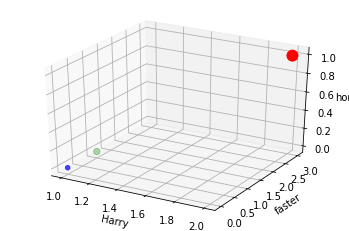

In [11]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from nltk.tokenize import TreebankWordTokenizer

sentence = "The faster Harry got to the store, the faster and faster Harry would get home."
tokenizer = TreebankWordTokenizer()
tokenize = tokenizer.tokenize
token_sequence = tokenize(sentence)

lexicon = ['faster', 'Harry', 'home']
vector1 = Counter(tok for tok in tokenize("The faster Harry got to the store, the faster and faster Harry would get home.") if tok in lexicon)
vector2 = Counter(tok for tok in tokenize("Jill is faster than Harry.") if tok in lexicon)
vector3 = Counter(tok for tok in tokenize("Jill and Harry fast.") if tok in lexicon)
corpus = [vector1, vector2, vector3]

corpus
# [Counter({'Harry': 2, 'faster': 3, 'home': 1}),
#  Counter({'Harry': 1, 'faster': 1}),
#  Counter()]

df = pd.DataFrame.from_records(corpus)
df = df.fillna(0)
df
#    Harry  faster  home
# 0    2.0     3.0   1.0
# 1    1.0     1.0   0.0
# 2    1.0     0.0   0.0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df.Harry, df.faster, df.home, s=20 * df.T.sum(), c=list('rgb'))
plt.xlabel('Harry')
plt.ylabel('faster')
ax.set_zlabel('home')
plt.show()

If you have two documents, you’ll find every unique word in each document and then find every unique word in the union of those two sets. This collections of words in your vocabulary is often called a lexicon, which is the same concept referenced in earlier chapters, just in terms of your special corpus

In [12]:
docs = ["The faster Harry got to the store, the faster and faster Harry would get home."]
docs.append("Harry is hairy and faster than Jill.")
docs.append("Jill is not as hairy as Harry.")

In [13]:
doc_tokens = []
for doc in docs:
  doc_tokens += [sorted(tokenizer.tokenize(doc.lower()))]
len(doc_tokens[0])

17

In [14]:
all_doc_tokens = sum(doc_tokens, [])
len(all_doc_tokens)

33

In [15]:
lexicon = sorted(set(all_doc_tokens))
len(lexicon)

18

Each of your three document vectors will need to have 18 values, even if the document
for that vector doesn’t contain all 18 words in your lexicon. Each token is
assigned a “slot” in your vectors corresponding to its position in your lexicon. Some of
those token counts in the vector will be zeros, which is what you want:

In [16]:
from collections import OrderedDict
zero_vector = OrderedDict((token, 0) for token in lexicon)
zero_vector

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

Now you’ll make copies of that base vector, update the values of the vector for each document, and store them in an array:

In [17]:
import copy
doc_vectors = []
for doc in docs:
  vec = copy.copy(zero_vector)
  tokens = tokenizer.tokenize(doc.lower())
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    vec[key] = value / len(lexicon)
    doc_vectors.append(vec)

In [18]:
doc_vectors

[OrderedDict([(',', 0.05555555555555555),
              ('.', 0.05555555555555555),
              ('and', 0.05555555555555555),
              ('as', 0),
              ('faster', 0.16666666666666666),
              ('get', 0.05555555555555555),
              ('got', 0.05555555555555555),
              ('hairy', 0),
              ('harry', 0.1111111111111111),
              ('home', 0.05555555555555555),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.05555555555555555),
              ('than', 0),
              ('the', 0.16666666666666666),
              ('to', 0.05555555555555555),
              ('would', 0.05555555555555555)]),
 OrderedDict([(',', 0.05555555555555555),
              ('.', 0.05555555555555555),
              ('and', 0.05555555555555555),
              ('as', 0),
              ('faster', 0.16666666666666666),
              ('get', 0.05555555555555555),
              ('got', 0.05555555555555555),
              ('hair

###Zipf’s Law

Zipf’s law states that given some corpus of natural language utterances, the
frequency of any word is inversely proportional to its rank in the frequency table.

In [19]:
nltk.download('brown')
from nltk.corpus import brown
brown.words()[:10]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [20]:
brown.tagged_words()[:5]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [21]:
len(brown.words())

1161192

In [22]:
#So with over 1 million tokens, you have something meaty to look at:

from collections import Counter
puncs = set((',', '.', '--', '-', '!', '?',':', ';', '``', "''", '(', ')', '[', ']'))
word_list = (x.lower() for x in brown.words() if x not in puncs)
token_counts = Counter(word_list)
token_counts.most_common(20)

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]

A quick glance shows that the word frequencies in the Brown corpus follow the logarithmic relationship Zipf predicted. “The” (rank 1 in term frequency) occurs roughly twice as often as “of” (rank 2 in term frequency), and roughly three times as often as “and” (rank 3 in term frequency).

## Topic modelling

Inverse document frequency, or IDF, is your window through Zipf in topic analysis.Let’s take your term frequency counter from earlier and expand on it. You can count tokens and bin them up two ways: per document and across the entire corpus. You’re going to be counting just by document.

First let’s get the total word count for each document in your corpus, intro_doc and history_doc:

In [23]:
from nlpia.data.loaders import kite_text, kite_history
kite_intro = kite_text.lower()
intro_tokens = tokenizer.tokenize(kite_intro)
kite_history = kite_history.lower()
history_tokens = tokenizer.tokenize(kite_history)
intro_total = len(intro_tokens)

intro_total

363

In [24]:
history_total = len(history_tokens)
history_total

297

In [25]:
intro_tf = {}
history_tf = {}
intro_counts = Counter(intro_tokens)
intro_tf['kite'] = intro_counts['kite'] / intro_total

history_counts = Counter(history_tokens)
history_tf['kite'] = history_counts['kite'] / history_total
'Term Frequency of "kite" in intro is: {:.4f}'.format(intro_tf['kite'])

'Term Frequency of "kite" in intro is: 0.0441'

In [26]:
'Term Frequency of "kite" in history is: {:.4f}'.format(history_tf['kite'])

'Term Frequency of "kite" in history is: 0.0202'

One TF is twice another. Does the intro mention more about kites than the history? Not exactly. Lets look deeper. First, let’s see how those numbers
relate to some other word, say “and”:

In [27]:
intro_tf['and'] = intro_counts['and'] / intro_total
history_tf['and'] = history_counts['and'] / history_total
print('Term Frequency of "and" in intro is: {:.4f}'.format(intro_tf['and']))

Term Frequency of "and" in intro is: 0.0275


In [28]:
print('Term Frequency of "and" in history is: {:.4f}'.format(history_tf['and']))

Term Frequency of "and" in history is: 0.0303


You know both of these documents are about “and” just as much as they are about “kite”

term’s IDF is merely the ratio of the total number of documents to the number
of documents the term appears in. In the case of “and” and “kite” in your current
example, the answer is the same for both:
 

*   2 total documents / 2 documents contain “and” = 2/2 = 1
*   2 total documents / 2 documents contain “kite” = 2/2 = 1
*   Not very interesting. So let’s look at another word “China.”
*   2 total documents / 1 document contains “China” = 2/1 = 2

Okay, that’s something different. Let’s use this “rarity” measure to weight the term frequencies:

In [29]:
num_docs_containing_and = 0
num_docs_containing_kite = 0
num_docs_containing_china = 0

for doc in [intro_tokens, history_tokens]:
  if 'and' in doc:
    num_docs_containing_and += 1
  if 'china' in doc:
    num_docs_containing_china += 1
  if 'kite' in doc:
    num_docs_containing_kite += 1

And let’s grab the TF of “China” in the two documents:

In [30]:
intro_tf['china'] = intro_counts['china'] / intro_total
history_tf['china'] = history_counts['china'] / history_total

And finally, the IDF for all three. You’ll store the IDFs in dictionaries per document
like you did with TF:

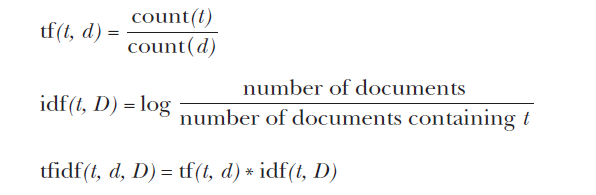

In [31]:
num_docs = 2
intro_idf = {}
history_idf = {}
intro_idf['and'] = num_docs / num_docs_containing_and
history_idf['and'] = num_docs / num_docs_containing_and
intro_idf['kite'] = num_docs / num_docs_containing_kite
history_idf['kite'] = num_docs / num_docs_containing_kite
intro_idf['china'] = num_docs / num_docs_containing_china
history_idf['china'] = num_docs / num_docs_containing_china

In [32]:
intro_tfidf = {}
intro_tfidf['and'] = intro_tf['and'] * intro_idf['and']
intro_tfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_tfidf['china'] = intro_tf['china'] * intro_idf['china']

In [33]:
history_tfidf = {}
history_tfidf['and'] = history_tf['and'] * history_idf['and']
history_tfidf['kite'] = history_tf['kite'] * history_idf['kite']
history_tfidf['china'] = history_tf['china'] * history_idf['china']

As you saw earlier, you can easily compare two vectors and get their similarity, but you
have since learned that merely counting words isn’t as descriptive as using their TFIDF.
Therefore, in each document vector let’s replace each word’s word_count with
the word’s TF-IDF. Now your vectors will more thoroughly reflect the meaning, or
topic, of the document, as shown in this Harry example:

## Relevance Ranking

In [34]:
document_tfidf_vectors = []
for doc in docs:
  vec = copy.copy(zero_vector)
  tokens = tokenizer.tokenize(doc.lower())
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    docs_containing_key = 0
    for _doc in docs:
      if key in _doc:
        docs_containing_key += 1
      tf = value / len(lexicon)
      if docs_containing_key:
        idf = len(docs) / docs_containing_key
      else:
        idf = 0
      vec[key] = tf * idf
    document_tfidf_vectors.append(vec)

In [35]:
document_tfidf_vectors

[OrderedDict([(',', 0.16666666666666666),
              ('.', 0.05555555555555555),
              ('and', 0.08333333333333333),
              ('as', 0),
              ('faster', 0.25),
              ('get', 0.16666666666666666),
              ('got', 0.16666666666666666),
              ('hairy', 0),
              ('harry', 0.0),
              ('home', 0.16666666666666666),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.16666666666666666),
              ('than', 0),
              ('the', 0.5),
              ('to', 0.16666666666666666),
              ('would', 0.16666666666666666)]),
 OrderedDict([(',', 0.16666666666666666),
              ('.', 0.05555555555555555),
              ('and', 0.08333333333333333),
              ('as', 0),
              ('faster', 0.25),
              ('get', 0.16666666666666666),
              ('got', 0.16666666666666666),
              ('hairy', 0),
              ('harry', 0.0),
              ('home', 

K-dimensional vector representation of each document in
the corpus. And now on to the hunt! Or search, in your case. Two vectors, in a given
vector space, can be said to be similar if they have a similar angle. If you imagine each
vector starting at the origin and reaching out its prescribed distance and direction,
the ones that reach out at the same angle are similar, even if they don’t reach out to
the same distance.

###Cosine similarity 

Two vectors are considered similar if their cosine similarity is high, so you can find
two similar vectors near each other if they minimize:

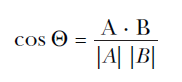

In [36]:
import math
def cosine_sim(vec1, vec2):
  """ Let's convert our dictionaries to lists for easier matching."""
  vec1 = [val for val in vec1.values()]
  vec2 = [val for val in vec2.values()]

  dot_prod = 0
  for i, v in enumerate(vec1):
    dot_prod += v * vec2[i]
  mag_1 = math.sqrt(sum([x**2 for x in vec1]))
  mag_2 = math.sqrt(sum([x**2 for x in vec2]))
  return dot_prod / (mag_1 * mag_2)

In [37]:
document_tfidf_vectors = []
for doc in docs:
  vec = copy.copy(zero_vector)
  tokens = tokenizer.tokenize(doc.lower())
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    docs_containing_key = 0
    for _doc in docs:
      if key in _doc:
        docs_containing_key += 1
    tf = value / len(lexicon)
    if docs_containing_key:
      idf = len(docs) / docs_containing_key
    else:
      idf = 0
    vec[key] = tf * idf
  document_tfidf_vectors.append(vec)

If you take your three documents about Harry, and make the query “How long does it take to get to the store?” as shown here you can safely say document 0 has the most relevance for your query! And with this
you can find relevant documents in any corpus, be it articles in Wikipedia, books from
Gutenberg, or tweets from the wild west that is Twitter. Google look out!

In [38]:
zero_vector

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [39]:
query = "How long does it take to get to the store?"
query_vec = copy.copy(zero_vector)
query_vec = copy.copy(zero_vector)

In [40]:
query_vec

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [41]:
tokens = tokenizer.tokenize(query.lower())
token_counts = Counter(tokens)
for key, value in token_counts.items():
  docs_containing_key = 0
  for _doc in docs:
    if key in _doc.lower():
      docs_containing_key += 1
  if docs_containing_key == 0:
    continue
  tf = value / len(tokens)
  idf = len(docs) / docs_containing_key
  query_vec[key] = tf * idf



In [42]:
cosine_sim(query_vec, document_tfidf_vectors[0])

0.6132857433407973

In [43]:
cosine_sim(query_vec, document_tfidf_vectors[1])

0.0

In [44]:
cosine_sim(query_vec, document_tfidf_vectors[2])

0.0

In [45]:
query_vec

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0.2727272727272727),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0.2727272727272727),
             ('than', 0),
             ('the', 0.2727272727272727),
             ('to', 0.5454545454545454),
             ('would', 0)])

In [46]:
document_tfidf_vectors[0]

OrderedDict([(',', 0.16666666666666666),
             ('.', 0.05555555555555555),
             ('and', 0.08333333333333333),
             ('as', 0),
             ('faster', 0.25),
             ('get', 0.16666666666666666),
             ('got', 0.16666666666666666),
             ('hairy', 0),
             ('harry', 0.0),
             ('home', 0.16666666666666666),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0.16666666666666666),
             ('than', 0),
             ('the', 0.5),
             ('to', 0.16666666666666666),
             ('would', 0.16666666666666666)])

# SKLEARN & MOVIE RECOMMENDATION SHOWCASE

You will need this zip file: "wiki_movie_plots_deduped.csv.zip"

You can download it from here:
https://www.kaggle.com/jrobischon/wikipedia-movie-plots/version/1

I suggest uploading the zip file onto google drive

In [47]:
# Give the location of the dataset
path_dataset ="/content/gdrive/MyDrive/Colab Notebooks/wiki_movie_plots_deduped.csv" 

import pandas as pd
data = pd.read_csv(path_dataset)
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [48]:

len(data)
  
import numpy as np
print(np.unique(data['Origin/Ethnicity']))
  
print(len(data.loc[data['Origin/Ethnicity']=='American']))
print(len(data.loc[data['Origin/Ethnicity']=='British']))

['American' 'Assamese' 'Australian' 'Bangladeshi' 'Bengali' 'Bollywood'
 'British' 'Canadian' 'Chinese' 'Egyptian' 'Filipino' 'Hong Kong'
 'Japanese' 'Kannada' 'Malayalam' 'Malaysian' 'Maldivian' 'Marathi'
 'Punjabi' 'Russian' 'South_Korean' 'Tamil' 'Telugu' 'Turkish']
17377
3670


In [49]:
# Concatenating American and British movies
df1 = pd.DataFrame(data.loc[data['Origin/Ethnicity']=='American'])
df2 = pd.DataFrame(data.loc[data['Origin/Ethnicity']=='British'])
data = pd.concat([df1, df2], ignore_index = True)
  
len(data)
  
finaldata = data[["Title", "Plot"]]          # Required columns - Title and movie plot
finaldata = finaldata.set_index('Title')    # Setting the movie title as index
  
finaldata.head(10)
finaldata["Plot"][0]

"A bartender is working at a saloon, serving drinks to customers. After he fills a stereotypically Irish man's bucket with beer, Carrie Nation and her followers burst inside. They assault the Irish man, pulling his hat over his eyes and then dumping the beer over his head. The group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. The bartender then sprays seltzer water in Nation's face before a group of policemen appear and order everybody to leave.[1]"

In [50]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
  
  
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
  
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Code below may take 10 mins:*

In [51]:

def preprocess_sentences(text):
  text = text.lower()
  temp_sent =[]
  words = nltk.word_tokenize(text)
  tags = nltk.pos_tag(words)
  for i, word in enumerate(words):
      if tags[i][1] in VERB_CODES: 
          lemmatized = lemmatizer.lemmatize(word, 'v')
      else:
          lemmatized = lemmatizer.lemmatize(word)
      if lemmatized not in stop_words and lemmatized.isalpha():
          temp_sent.append(lemmatized)
          
  finalsent = ' '.join(temp_sent)
  finalsent = finalsent.replace("n't", " not")
  finalsent = finalsent.replace("'m", " am")
  finalsent = finalsent.replace("'s", " is")
  finalsent = finalsent.replace("'re", " are")
  finalsent = finalsent.replace("'ll", " will")
  finalsent = finalsent.replace("'ve", " have")
  finalsent = finalsent.replace("'d", " would")
  return finalsent
  
finaldata["plot_processed"]= finaldata["Plot"].apply(preprocess_sentences)
finaldata.head()

,Plot,plot_processed
Title,,
Kansas Saloon Smashers,"A bartender is working at a saloon, serving dr...",bartender work saloon serve drink customer fil...
Love by the Light of the Moon,"The moon, painted with a smiling face hangs ov...",moon paint smile face hang park night young co...
The Martyred Presidents,"The film, just over a minute long, is composed...",film minute long compose two shot first girl s...
"Terrible Teddy, the Grizzly King",Lasting just 61 seconds and consisting of two ...,last second consist two shot first shot set wo...
Jack and the Beanstalk,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_movieid2 = tfidfvectorizer.fit_transform((finaldata["plot_processed"]))


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing pre-processed movie plots using TF-IDF
tfidfvec = TfidfVectorizer()
tfidf_movieid = tfidfvec.fit_transform((finaldata["plot_processed"]))
  
# Finding cosine similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_movieid, tfidf_movieid)

In [60]:
count_movieid2 = countvectorizer.fit_transform((finaldata["plot_processed"]))


In [61]:
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [62]:
tfidfvec.get_feature_names_out()

array(['aa', 'aaa', 'aaaiiigh', ..., '裕仁', '賢治', '魔怪'], dtype=object)

In [63]:
count_tokens

array(['aa', 'aaa', 'aaaiiigh', ..., '裕仁', '賢治', '魔怪'], dtype=object)

In [64]:
tfidf_tokens

array(['aa', 'aaa', 'aaaiiigh', ..., '裕仁', '賢治', '魔怪'], dtype=object)

In [65]:
tfidf_movieid2

<21047x81140 sparse matrix of type '<class 'numpy.float64'>'
	with 2793699 stored elements in Compressed Sparse Row format>

In [66]:
tfidf_movieid


<21047x81323 sparse matrix of type '<class 'numpy.float64'>'
	with 3085663 stored elements in Compressed Sparse Row format>

In [67]:
len(cos_sim)

21047

In [68]:
# Storing indices of the data
indices = pd.Series(finaldata.index)
  
def recommendations(title, cosine_sim = cos_sim):
    recommended_movies = []
    index = indices[indices == title].index[0]
    similarity_scores = pd.Series(cosine_sim[index]).sort_values(ascending = False)
    top_10_movies = list(similarity_scores.iloc[1:11].index)
    for i in top_10_movies:
        recommended_movies.append(list(finaldata.index)[i])
    return recommended_movies

In [69]:
indices

0                  Kansas Saloon Smashers
1           Love by the Light of the Moon
2                 The Martyred Presidents
3        Terrible Teddy, the Grizzly King
4                  Jack and the Beanstalk
                       ...               
21042        Murder on the Orient Express
21043                        Paddington 2
21044                   Finding Your Feet
21045          All the Money in the World
21046                     You, Me and Him
Name: Title, Length: 21047, dtype: object

In [70]:
recommendations("Batman")


['Batman',
 'The Lego Batman Movie',
 'Batman Forever',
 'Dark Knight Rises, TheThe Dark Knight Rises',
 'The Dark Knight Rises',
 'Batman',
 ' The Dark Knight',
 'The Dark Knight',
 'Batman Begins',
 'Batman: Mask of the Phantasm']

# Lab Submission 2 (Due Sunday Week 4, 11:59 PM)

1. Attempt to use what you've learned to perform TF-IDF on the stories dataset. Select at least two documents (txt). You can use sklearn, nltk and any other libraries. Explain any findings can you obtain

Make sure at the bare minimum to show the following:
*   Remove stopwords
*   Remove punctuations
*   Show top rankings (IF POSSIBLE)
*   Show TF-IDF values of words




Hint to load text files:

In [84]:
f = open("/content/gdrive/MyDrive/Colab Notebooks/stories/3student.txt", "r")

#read whole file to a string
data = f.read()
 
#close file
f.close()

f = open("/content/gdrive/MyDrive/Colab Notebooks/stories/3wishes.txt", "r")

#read whole file to a string
data2 = f.read()
 
#close file
f.close()


In [85]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
  
  
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
  
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
def preprocess_sentences(text):
  text = text.lower()
  temp_sent =[]
  words = nltk.word_tokenize(text)
  tags = nltk.pos_tag(words)
  for i, word in enumerate(words):
      if tags[i][1] in VERB_CODES: 
          lemmatized = lemmatizer.lemmatize(word, 'v')
      else:
          lemmatized = lemmatizer.lemmatize(word)
      if lemmatized not in stop_words and lemmatized.isalpha():
          temp_sent.append(lemmatized)
          
  finalsent = ' '.join(temp_sent)
  finalsent = finalsent.replace("n't", " not")
  finalsent = finalsent.replace("'m", " am")
  finalsent = finalsent.replace("'s", " is")
  finalsent = finalsent.replace("'re", " are")
  finalsent = finalsent.replace("'ll", " will")
  finalsent = finalsent.replace("'ve", " have")
  finalsent = finalsent.replace("'d", " would")
  return finalsent

Hint to append data:

In [87]:
dataset=[]
dataset.append(preprocess_sentences(data))
dataset.append(preprocess_sentences(data2))


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing pre-processed movie plots using TF-IDF
tfidfvec = TfidfVectorizer()
tfidf_movieplot = tfidfvec.fit_transform((dataset))

In [89]:
tfidf_tokens = tfidfvec.get_feature_names_out()

Hint to show DF of TF-IDF of two documents:

**CAUTION THIS MAY CAUSE MEMORY ERROR IF TOO MANY DOCUMENTS ARE USED**

In [90]:
df_tfidfvect = pd.DataFrame(data = tfidf_movieplot.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)
df_tfidfvect

,aback,able,abortive,abrupt,absent,absolutely,absurd,accident,accidentally,accuse,...,writhe,wrong,year,yellow,yes,yesterday,yet,yield,yonder,young
Doc1,0.000000,0.006791,0.006791,0.006791,0.013582,0.013582,0.006791,0.006791,0.006791,0.006791,...,0.006791,0.006791,0.027165,0.006791,0.062816,0.027165,0.013582,0.006791,0.006791,0.06112
Doc2,0.030349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.043187,0.000000,0.000000,0.000000,0.000000,0.00000


#Findings: 
###The text file from the stories after preprocessing were missing a few details such as the title, the code, etc. as can be seen in the example comparison below

In [98]:
# before preprocessing
data

':.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:\n         -----=====Earth\'s Dreamlands=====-----\n           (313)558-5024 {14.4} (313)558-5517\n              A BBS for text file junkies\n              RPGNet GM File Archive Site\n.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.\n\n             The Adventure of the Three Students\n\n  It was in the year \'95 that a combination of events, into which I\nneed not enter, caused Mr. Sherlock Holmes and myself to spend\nsome weeks in one of our great university towns, and it was\nduring this time that the small but instructive adventure which I\nam about to relate befell us. It will be obvious that any details\nwhich would help the reader exactly to identify the college or the\ncriminal would be injudicious and offensive. So painful a scan-\ndal may well be allowed to die out. With due discretion the\nincident itself may, however, be described, since it serves to\nillustrate some of those qualities for which my f

In [97]:
# after preprocessing
dataset[0]

'bb text file junky rpgnet gm file archive site adventure three student year combination event need enter cause sherlock holmes spend week one great university town time small instructive adventure relate befell u obvious detail would help reader exactly identify college criminal would injudicious offensive painful dal may well allow die due discretion incident may however describe since serve illustrate quality friend markable endeavour statement avoid term would serve limit event particular place give clue people concerned reside time furnished lodging close library sherlock holmes pursue laborious research early english charter research lead result strike may subject one future narrative one evening receive visit acquaintance hilton soames tutor turer college luke soames tall spare man nervous excitable temperament always know restless manner particular occasion state uncontrollable agitation clear something unusual occur trust holmes spare hour valuable time painful incident luke r